In [2]:
#데이터조회
import pandas as pd
act = pd.read_csv('../data/dailyActivity_merged_fin_sum.csv')
act_grade = act.copy()
act_grade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1373 non-null   int64  
 1   ActivityDate              1373 non-null   object 
 2   TotalSteps                1373 non-null   int64  
 3   TotalDistance             1373 non-null   float64
 4   TrackerDistance           1373 non-null   float64
 5   LoggedActivitiesDistance  1373 non-null   float64
 6   VeryActiveDistance        1373 non-null   float64
 7   ModeratelyActiveDistance  1373 non-null   float64
 8   LightActiveDistance       1373 non-null   float64
 9   SedentaryActiveDistance   1373 non-null   float64
 10  VeryActiveMinutes         1373 non-null   int64  
 11  FairlyActiveMinutes       1373 non-null   int64  
 12  LightlyActiveMinutes      1373 non-null   int64  
 13  SedentaryMinutes          1373 non-null   int64  
 14  Calories

Id 사용자id 	
ActivityDate 작동일시(일) 	
TotalSteps 총걸음수	
TotalDistance 총거리	
TrackerDistance	기기측정거리
LoggedActivitiesDistance 이용자입력거리 	
VeryActiveDistance 고강도구간(빡센운동)
ModeratelyActiveDistance 중강도구간(가벼운운동)
LightActiveDistance	저강도구간(일상적움직임)
SedentaryActiveDistance 미세강도구간(버그구간)	
VeryActiveMinutes 고강도시간	
FairlyActiveMinutes	중강도시간
LightlyActiveMinutes 저강도시간
SedentaryMinutes 착석시간(움직임없음)
Calories 소비칼로리
           

In [3]:
# 추가 전처리 - [단위 변환] Mile -> Km 

# 변환할 컬럼 리스트 자동 추출
distance_cols = [col for col in act_grade.columns if 'Distance' in col]

# 1 Mile = 1.60934 Km
# 모든 거리 컬럼에 1.60934를 곱해서 km로 변환
act_grade[distance_cols] = act_grade[distance_cols] * 1.60934

# 소수점 2자리로 깔끔하게 정리
act_grade[distance_cols] = act_grade[distance_cols].round(2)

# 잘 바뀌었나 확인 
print("=== 🇰🇷 [단위 변환 완료] Mile -> Km ===")
act_grade[distance_cols].head()


=== 🇰🇷 [단위 변환 완료] Mile -> Km ===


,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance
0,11.44,11.44,0.0,4.14,0.74,6.55,0.0
1,18.59,18.59,0.0,11.14,1.17,6.29,0.0
2,13.73,13.73,0.0,7.50,0.26,5.97,0.0
3,14.37,14.37,0.0,5.13,1.27,7.97,0.0
4,12.63,12.63,0.0,3.48,1.75,7.42,0.0


In [4]:
# 날짜 변환 (String -> Datetime)
act_grade['ActivityDate'] = pd.to_datetime(act_grade['ActivityDate'])
# 요일 변수 추가 (0=월요일, 6=일요일)
act_grade['DayOfWeek'] = act_grade['ActivityDate'].dt.day_name()

# 명목형 변수 변환 (Int -> String)
# 이유: 'Id'는 숫자지만 더하거나 평균을 내는 게 의미 없음. 실수로 계산되지 않도록 문자열(str)로 바꿔줌
act_grade['Id'] = act_grade['Id'].astype(str)

# 숫자 단위 통일 및 정리 (Rounding)
# 이유: Distance 관련 컬럼들이 소수점 13자리까지 있어서 보기 힘듦. 소수점 2자리로 축약
dist_cols = ['TotalDistance', 'TrackerDistance', 'VeryActiveDistance', 
             'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance']
act_grade[dist_cols] = act_grade[dist_cols].round(2)

# 논리적 이상치 처리 (Data Consistency)
# 이유: 하루는 24시간(1440분)인데, 다 더해서 1440분이 넘는 데이터는 '오류'. 1440분 초과 데이터를 제거
act_grade['Total_Minutes_Check'] = (act_grade['VeryActiveMinutes'] + 
                              act_grade['FairlyActiveMinutes'] + 
                              act_grade['LightlyActiveMinutes'] + 
                              act_grade['SedentaryMinutes'])

# 1440분 이하인 정상 데이터만 남기기
act_clean = act_grade[act_grade['Total_Minutes_Check'] <= 1440].copy()

# 결과 확인
print("--- 전처리 후 데이터 정보 ---")
act_clean.info()
print("\n--- 상위 5개 데이터 확인 (요일, ID, 소수점 확인) ---")
act_clean[['Id', 'ActivityDate', 'DayOfWeek', 'TotalDistance', 'Total_Minutes_Check']].head()

--- 전처리 후 데이터 정보 ---
<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1372
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        1359 non-null   object        
 1   ActivityDate              1359 non-null   datetime64[ns]
 2   TotalSteps                1359 non-null   int64         
 3   TotalDistance             1359 non-null   float64       
 4   TrackerDistance           1359 non-null   float64       
 5   LoggedActivitiesDistance  1359 non-null   float64       
 6   VeryActiveDistance        1359 non-null   float64       
 7   ModeratelyActiveDistance  1359 non-null   float64       
 8   LightActiveDistance       1359 non-null   float64       
 9   SedentaryActiveDistance   1359 non-null   float64       
 10  VeryActiveMinutes         1359 non-null   int64         
 11  FairlyActiveMinutes       1359 non-null   int64         
 12  Ligh

,Id,ActivityDate,DayOfWeek,TotalDistance,Total_Minutes_Check
0,1503960366,2016-03-25,Friday,11.44,1054
1,1503960366,2016-03-26,Saturday,18.59,968
2,1503960366,2016-03-27,Sunday,13.73,934
3,1503960366,2016-03-28,Monday,14.37,1363
4,1503960366,2016-03-29,Tuesday,12.63,1062


In [5]:

# (1) 총 활동 시간 (Total_Active_Minutes)
act_clean['Total_Active_Minutes'] = (
    act_clean['VeryActiveMinutes'] + 
    act_clean['FairlyActiveMinutes'] + 
    act_clean['LightlyActiveMinutes']
)
# (2) 운동 강도 점수 (Intensity_Score)
act_clean['Intensity_Score'] = (
    (act_clean['VeryActiveMinutes'] * 2) + 
    (act_clean['FairlyActiveMinutes'] * 1.5) + 
    (act_clean['LightlyActiveMinutes'] * 1)
)
# (3) 활동 등급 (Activity_Grade)
act_clean['Activity_Grade'] = pd.qcut(
    act_clean['Intensity_Score'], 
    q=3, 
    labels=['Low', 'Medium', 'High']
)
# 잘 만들어졌는지 확인
act_clean[['Id', 'Total_Active_Minutes', 'Intensity_Score', 'Activity_Grade']].head()
# 등급별로 몇 명이나 있는지 확인
act_clean['Activity_Grade'].value_counts()

Activity_Grade
Low       453
Medium    453
High      453
Name: count, dtype: int64

In [6]:
# 등급별 소비 칼로리 확인
# 'Activity_Grade'로 그룹을 묶고, 'Calories' 컬럼의 통계(평균, 최소, 최대 등)를 확인
calorie_stats = act_clean.groupby('Activity_Grade')['Calories'].describe()
calorie_stats_rounded = calorie_stats.round(2) #소수점 2자리까지 
calorie_stats_rounded

C:\Users\USER\AppData\Local\Temp\ipykernel_23152\3061113156.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calorie_stats = act_clean.groupby('Activity_Grade')['Calories'].describe()


,count,mean,std,min,25%,50%,75%,max
Activity_Grade,,,,,,,,
Low,453.0,1857.90,578.95,0.0,1469.0,1841.0,2130.0,3728.0
Medium,453.0,2309.98,552.53,1248.0,1851.0,2203.0,2806.0,4010.0
High,453.0,2728.86,768.15,1144.0,2094.0,2576.0,3324.0,5517.0


In [7]:
# '상' 등급이고 활동시간도 높은 사람들 : 헬창
# 조건: 활동 시간이 중앙값보다 길고(>=) AND 등급이 High인 사람
# 정렬: 강도 점수가 높은 순서대로 (내림차순) -> "누가 제일 빡세게 했나?"

time_median = act_clean['Total_Active_Minutes'].median()# 기준점(중앙값) 계산
elite_examples = act_clean[
    (act_clean['Total_Active_Minutes'] >= time_median) & 
    (act_clean['Activity_Grade'] == 'High')
].sort_values(by='Intensity_Score', ascending=False).head()
print("--- '헬창' 케이스 ---")
elite_examples

--- '헬창' 케이스 ---


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,Total_Minutes_Check,Total_Active_Minutes,Intensity_Score,Activity_Grade
425,2891001357,2016-04-01,0,0.00,0.00,7.77,0.00,0.00,0.00,0.0,0,660,0,780,4562,Friday,1440,660,990.0,High
426,2891001357,2016-04-02,4126,5.18,0.00,5.18,0.00,0.00,5.18,0.0,0,0,720,720,2881,Saturday,1440,720,720.0,High
884,5577150313,2016-05-01,13368,16.08,16.08,0.00,8.55,2.32,5.21,0.0,194,72,178,499,4546,Sunday,943,444,674.0,High
1338,8877689391,2016-04-16,29326,40.70,40.70,0.00,21.31,1.95,17.24,0.0,94,29,429,888,4547,Saturday,1440,552,660.5,High
870,5577150313,2016-04-24,15764,18.96,18.96,0.00,12.31,3.46,3.19,0.0,210,65,141,425,4392,Sunday,841,416,658.5,High


In [8]:
# '하' 등급이고 활동시간도 낮은 사람들 : 깔짝충
# 조건: 활동 시간이 중앙값보다 짧고(<) AND 등급이 Low인 사람
# 정렬: 활동 시간이 적은 순서대로 (오름차순) -> "누가 제일 안 움직였나?"
ggal_examples = act_clean[
    (act_clean['Total_Active_Minutes'] < time_median) & 
    (act_clean['Activity_Grade'] == 'Low')
].sort_values(by='Total_Active_Minutes', ascending=True).head()
print("--- '깔짝충' 케이스 ---")
ggal_examples

--- '깔짝충' 케이스 ---


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,Total_Minutes_Check,Total_Active_Minutes,Intensity_Score,Activity_Grade
40,1503960366,2016-05-12,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0,Thursday,1440,0,0.0,Low
1330,8792009665,2016-05-09,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688,Monday,1440,0,0.0,Low
1285,8583815059,2016-05-04,3588,4.51,4.51,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,2516,Wednesday,1440,0,0.0,Low
1299,8792009665,2016-04-17,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688,Sunday,1440,0,0.0,Low
1301,8792009665,2016-04-19,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688,Tuesday,1440,0,0.0,Low


In [9]:
# '상' 등급이지만 활동시간은 낮은 사람들 : 고효율
short_but_high = act_clean[act_clean['Activity_Grade'] == 'High'].sort_values(by='Total_Active_Minutes').head()

print("--- '고효율' 케이스 ---")
short_but_high

--- '고효율' 케이스 ---


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,Total_Minutes_Check,Total_Active_Minutes,Intensity_Score,Activity_Grade
1175,8053475328,2016-05-05,14990,18.52,18.52,0.0,14.24,0.72,3.56,0.0,93,9,130,1208,2950,Thursday,1440,232,329.5,High
857,5577150313,2016-04-12,8135,9.78,9.78,0.0,5.79,0.61,3.38,0.0,86,16,140,728,3405,Tuesday,970,242,336.0,High
864,5577150313,2016-04-19,12574,15.16,15.16,0.0,11.30,1.03,2.83,0.0,108,23,111,733,3501,Tuesday,975,242,361.5,High
1109,7086361926,2016-04-20,14365,17.12,17.12,0.0,12.30,0.72,4.09,0.0,87,13,145,797,2997,Wednesday,1042,245,338.5,High
1150,8053475328,2016-04-20,15108,19.62,19.62,0.0,15.42,0.37,3.83,0.0,89,5,158,695,3043,Wednesday,947,252,343.5,High


In [10]:
# '하' 등급이지만 활동시간은 높은 사람들 : 저효율
long_but_low = act_clean[act_clean['Activity_Grade'] == 'Low'].sort_values(by='Total_Active_Minutes', ascending=False).head()

print("\n--- '저효율' 케이스 ---")
long_but_low


--- '저효율' 케이스 ---


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,Total_Minutes_Check,Total_Active_Minutes,Intensity_Score,Activity_Grade
270,2026352035,2016-04-15,3821,3.81,3.81,0.0,0.0,0.0,3.81,0.00,0,0,188,687,1444,Friday,875,188,188.0,Low
518,4020332650,2016-03-29,4152,4.80,4.80,0.0,0.0,0.0,4.76,0.00,0,0,187,1253,2976,Tuesday,1440,187,187.0,Low
69,1624580081,2016-04-21,6349,6.65,6.65,0.0,0.0,0.0,6.61,0.03,0,0,186,1254,1467,Thursday,1440,186,186.0,Low
290,2026352035,2016-04-06,3180,3.17,3.17,0.0,0.0,0.0,3.17,0.00,0,0,185,738,1421,Wednesday,923,185,185.0,Low
293,2026352035,2016-04-09,3098,3.09,3.09,0.0,0.0,0.0,3.09,0.00,0,0,185,700,1413,Saturday,885,185,185.0,Low


In [11]:
import numpy as np
# 효율성 지표(Efficiency) 만들기
# 공식: 운동 강도 점수(Intensity_Score) / 총 활동 시간(Total_Active_Minutes)
# 의미: 1분 움직일 때마다 몇 점이나 따냈나 (높을수록 고강도 운동!)
# 주의: 활동 시간이 0분인 경우 에러가 나지 않도록 np.where로 예외 처리
act_clean['Efficiency'] = np.where(
    act_clean['Total_Active_Minutes'] > 0, 
    act_clean['Intensity_Score'] / act_clean['Total_Active_Minutes'], 
    0
)

이쯤에서 중간정리(내머릿속)...
'개인별 맞춤화'니까 어떻게 해야 덜 힘들고(또는 짧게 하고) 살을 많이 뺄까? 가 중요함...왜냐면 내가 맨날이생각하니까
분석 목표 1번: 등급별, 운동 강도별 최적의 칼로리 소모 구간 발견 (쌀먹가능구간찾아서 맞춤형으로 이용자들에게 제시)
1번으로 재미를 붙인 사람들이 상급으로 가고싶어할때 상급유저들의 노하우를 알려준다...(일종의 pt개념)
분석 목표 2번: 상위 등급 유저들의 운동 패턴 특성 파악 및 등급 상승을 위한 핵심 요인 도출 (족보개념)
똑같이 1번에서 재미를 못느끼고 튕겨나갈사람들을 위한 이탈방지책 필요하다고 생각 (여기서는 충분한 정보가 도움 많이됨!)
분석 목표 3번: 운동 효율성 저조 그룹 식별 및 맞춤형 케어 전략 수립 (적당히 쉬는시간 많이주거나, 꿀팁을준다)
애초에 상급으로 시작한 사람들은... 지금 충분히 잘하고있다는 나데나데가 필요함... 혹은 배틀로얄?
분석 목표 4번: 시간 대비 칼로리/효율의 수확 체감 지점 찾기(이지점에서 휴식하세요, 더하면 역효과! 같은 알림으로 전문성 어필과 목표성취 인지)
분석 목표 4-1번: 운동 강도의 표준편차(Variation) 확인 (훈련방식을 인터벌로 바꾸자는 의견 등으로 매너리즘 방지)
분석 목표 4-2번: 동일 시간 대비 칼로리 소모량 분포 확인 (같은 상급에서도 순위를 붙여서 경쟁심 자극)
4번만 많은 이유는... 사실 운동을 꾸준히 하던 사람들이 앞으로도 꾸준히 할수밖에 없기때문. 그니까 주 고객층이라고 생각했음
123번은 입문자, 4번은 숙련자~전문가용 

In [12]:
#등급별, 운동 강도별 최적의 칼로리 소모 구간 발견
import numpy as np
# [추가 전처리] 분석을 위한 구간(Binning) 만들기

# 1️[Workout_Intensity] 운동 강도 레벨 구체화
# Efficiency(효율)는 1.0(산책) ~ 2.0(전력질주) 사이의 값을 가집니다.
# 이걸 사람이 이해하기 쉬운 '저/중/고' 강도로 나눕니다.
bins_eff = [0.0, 1.1, 1.5, 3.0] # 1.1 이하는 가벼운 운동, 1.5 이상은 빡센 운동
labels_eff = ['Light_Int(가벼움)', 'Moderate_Int(중강도)', 'Vigorous_Int(고강도)']
act_clean['Workout_Intensity'] = pd.cut(act_clean['Efficiency'], bins=bins_eff, labels=labels_eff)

# 2️[Time_Bin] 운동 시간대 구간 나누기 (30분 단위)
# 0분~30분, 30분~60분... 이렇게 쪼개야 "몇 분 하는 게 좋아요?"라고 말해줄 수 있죠.
# 최대 시간 확인 후 넉넉하게 5시간(300분)까지 잡습니다.
bins_time = list(range(0, 330, 30))
labels_time = [f'{i}~{i+30}분' for i in bins_time[:-1]]
act_clean['Time_Bin'] = pd.cut(act_clean['Total_Active_Minutes'], bins=bins_time, labels=labels_time, right=False)

# [핵심 분석] 등급 x 강도 x 시간대별 '가성비' 찾기
# 3️⃣ 그룹별 평균 계산 (평균 칼로리, 평균 효율성, 샘플 수)
analysis_result = act_clean.groupby(['Activity_Grade', 'Workout_Intensity', 'Time_Bin'])[['Calories', 'Efficiency', 'Total_Active_Minutes']].agg(['mean', 'count']).reset_index()

# 컬럼 이름 깔끔하게 정리 (Multi-index 해제)
analysis_result.columns = ['Activity_Grade', 'Workout_Intensity', 'Time_Bin', 'Calories', 'Count', 'Efficiency', 'Count_Eff', 'Total_Active_Minutes', 'Count_Min']
# 중복된 Count 컬럼 제거
analysis_result = analysis_result[['Activity_Grade', 'Workout_Intensity', 'Time_Bin', 'Calories', 'Efficiency', 'Total_Active_Minutes', 'Count']]

# 4️⃣ [신뢰도 필터링] 샘플 수가 너무 적은(10개 미만) 데이터는 '우연'일 수 있으니 제거
reliable_data = analysis_result[analysis_result['Count'] >= 10].copy()

# 5️⃣ [Sweet Spot 찾기] 효율성(Efficiency) 높은 순서대로 랭킹!
top_sweet_spots = reliable_data.sort_values(by='Efficiency', ascending=False)


# 결과 리포트

print("=== [전체 랭킹] 데이터로 입증된 '최고의 가성비' 운동 구간 (Top 5) ===")
display(top_sweet_spots[['Activity_Grade', 'Workout_Intensity', 'Time_Bin', 'Efficiency', 'Calories', 'Count']].head(5))
print("\n")

print("=== [초급자(Low) 필독] 초급자가 무리 안 하고 뽕 뽑는 구간 (Top 5) ===")
beginner_tips = top_sweet_spots[top_sweet_spots['Activity_Grade'] == 'Low']
beginner_tips[['Workout_Intensity', 'Time_Bin', 'Efficiency', 'Calories', 'Count']].head(5)

#  만약 초급자 결과에 'Moderate_Int'가 상위권에 있다면?
# -> "초급자님, 산책만 하지 말고 숨 찰 정도로 30분만 걸어보세요. 그게 2시간 산책보다 낫습니다!" 라고 말해주면 됨.

=== [전체 랭킹] 데이터로 입증된 '최고의 가성비' 운동 구간 (Top 5) ===


C:\Users\USER\AppData\Local\Temp\ipykernel_23152\104185370.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis_result = act_clean.groupby(['Activity_Grade', 'Workout_Intensity', 'Time_Bin'])[['Calories', 'Efficiency', 'Total_Active_Minutes']].agg(['mean', 'count']).reset_index()


,Activity_Grade,Workout_Intensity,Time_Bin,Efficiency,Calories,Count
78,High,Moderate_Int(중강도),240~270분,1.334525,2973.368421,19
79,High,Moderate_Int(중강도),270~300분,1.266971,2895.938462,65
46,Medium,Moderate_Int(중강도),180~210분,1.248015,2568.466667,30
14,Low,Moderate_Int(중강도),120~150분,1.246273,2229.250000,16
47,Medium,Moderate_Int(중강도),210~240분,1.234045,2415.823529,51




=== [초급자(Low) 필독] 초급자가 무리 안 하고 뽕 뽑는 구간 (Top 5) ===


,Workout_Intensity,Time_Bin,Efficiency,Calories,Count
14,Moderate_Int(중강도),120~150분,1.246273,2229.250000,16
5,Light_Int(가벼움),150~180분,1.012360,1918.470588,51
3,Light_Int(가벼움),90~120분,1.011388,1856.090909,44
4,Light_Int(가벼움),120~150분,1.007106,1981.679245,53
2,Light_Int(가벼움),60~90분,1.006845,1832.527778,36


In [13]:
#상위 등급 유저들의 운동 패턴 특성 파악 및 등급 상승을 위한 핵심 요인 도출
import numpy as np
# 분석 목표 2: "상위 랭커(High)들의 비밀 족보" 만들기

# 1 [패턴 비교] 등급별로 주요 스탯(능력치) 비교하기
key_stats = [
    'TotalSteps',           # 걸음 수
    'TotalDistance',        # 이동 거리 (km)
    'VeryActiveMinutes',    # 고강도 운동 시간 (분)
    'FairlyActiveMinutes',  # 중강도 운동 시간 (분)
    'LightlyActiveMinutes', # 저강도 운동 시간 (분)
    'Calories',             # 소모 칼로리
    'Efficiency'            # 효율성 (가성비)
]
# 등급별 평균 계산 (Mean)
grade_profile =act_clean.groupby('Activity_Grade')[key_stats].mean().reset_index()

# 2️[Gap 분석] "도대체 뭐가 부족해서 내가 Low 등급인가?"
# 상급(High) 평균에서 초급(Low) 평균을 빼서 격차(Gap)를 확인합니다.
high_stat = grade_profile[grade_profile['Activity_Grade'] == 'High'][key_stats].iloc[0]
low_stat = grade_profile[grade_profile['Activity_Grade'] == 'Low'][key_stats].iloc[0]
# 격차 비율 계산 (High가 Low보다 몇 %나 더 높은지)
gap_ratio = ((high_stat - low_stat) / low_stat * 100).sort_values(ascending=False)

# 3️[족보 생성] 상급자로 가기 위한 "일일 권장 퀘스트(KPI)" 설정
# 평균값은 너무 높을 수 있으니, 상급자들의 '중앙값(Median)'을 현실적인 목표로 제시합니다.
target_kpi = act_clean[act_clean['Activity_Grade'] == 'High'][key_stats].median()

#결과 도출

print("=== [다들 어떻게 하고 있을까] 등급별 운동 패턴 비교 (평균) ===")
display(grade_profile)
print("\n")

print("=== [당신에게 필요해요] 등급 상승을 위해 가장 시급한 것 (격차 Top 3) ===")
# 격차가 클수록 "이걸 안 해서 등급이 낮은 것"입니다.
display(gap_ratio.head(3))
print(">> 해석: 걸음 수나 거리보다 '고강도 운동(Very Active)' 부족이 제일 심각함!")
print("\n")

print("===  [상급자 족보] 오늘부터 이것만 맞추세요 (일일 목표) ===")
print(f"1.  고강도 운동: 하루 최소 {int(target_kpi['VeryActiveMinutes'])}분 이상 (숨 찰 정도로!)")
print(f"2.  하루 걸음 수: {int(target_kpi['TotalSteps']):,}보")
print(f"3.  이동 거리: {target_kpi['TotalDistance']:.1f}km")
print(f"4.  목표 칼로리: {int(target_kpi['Calories'])}kcal")

=== [다들 어떻게 하고 있을까] 등급별 운동 패턴 비교 (평균) ===


C:\Users\USER\AppData\Local\Temp\ipykernel_23152\1409701115.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_profile =act_clean.groupby('Activity_Grade')[key_stats].mean().reset_index()


,Activity_Grade,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,Calories,Efficiency
0,Low,2158.066225,2.448411,2.419426,2.015453,66.399558,1857.902870,0.718246
1,Medium,7633.944812,8.710442,14.768212,13.315673,215.008830,2309.977925,1.094360
2,High,12290.388521,14.303532,42.456954,25.796909,281.576159,2728.858720,1.166368




=== [당신에게 필요해요] 등급 상승을 위해 가장 시급한 것 (격차 Top 3) ===


VeryActiveMinutes      1654.835766
FairlyActiveMinutes    1179.956188
TotalDistance           484.196623
dtype: float64

>> 해석: 걸음 수나 거리보다 '고강도 운동(Very Active)' 부족이 제일 심각함!


===  [상급자 족보] 오늘부터 이것만 맞추세요 (일일 목표) ===
1.  고강도 운동: 하루 최소 33분 이상 (숨 찰 정도로!)
2.  하루 걸음 수: 11,943보
3.  이동 거리: 13.1km
4.  목표 칼로리: 2576kcal


In [14]:
#운동 효율성 저조 그룹 식별 및 맞춤형 케어 전략 수립
import numpy as np
# 분석 목표 3: "노력 대비 성과가 안 나오는 짠한 유저들" 구출 작전

# 1️[위험군 식별] 효율성 하위 25% 그룹 찾기
# 효율성(Efficiency)이 하위 25%인 지점(Threshold)을 계산합니다.
low_eff_threshold = act_clean['Efficiency'].quantile(0.25)

# 저효율 그룹 필터링 (단, 운동 시간이 0분인 데이터는 제외)
low_eff_group = act_clean[(act_clean['Efficiency'] <= low_eff_threshold) & (act_clean['Total_Active_Minutes'] > 0)].copy()

# 2️[원인 분석] 도대체 왜 효율이 낮을까? (유형별 세분화)
# Type A: 깔짝형 (20분 미만) - "간만 보다가 끝남"
type_short = low_eff_group[low_eff_group['Total_Active_Minutes'] < 20]

# Type B: 뚜벅이형 (60분 이상) - "오래 걷는데 강도가 낮음 (산책 위주)"
type_long = low_eff_group[low_eff_group['Total_Active_Minutes'] >= 60]

# Type C: 정체기형 (20~60분) - "적당히 하는데 임팩트가 없음"
type_middle = low_eff_group[(low_eff_group['Total_Active_Minutes'] >= 20) & (low_eff_group['Total_Active_Minutes'] < 60)]


# 3️[비교군 설정] 고효율 그룹(상위 25%)은 어떻게 하나?
high_eff_group = act_clean[act_clean['Efficiency'] >= act_clean['Efficiency'].quantile(0.75)]

# 맞춤형 케어 전략 리포트

print(f"=== 🚨 [긴급 점검] 효율성 저조 그룹 분석 (총 {len(low_eff_group)}명) ===")
print(f"기준: 효율성 하위 25% (Efficiency <= {low_eff_threshold:.2f})")
print("\n")

print("===  [진단 결과] 저효율 유형 분포 ===")
print(f"1.  뚜벅이형 (60분 이상): {len(type_long)}명 ({len(type_long)/len(low_eff_group)*100:.1f}%)  압도적 다수!")
print("   >> 특징: 시간은 엄청 많이 쓰는데(평균 1시간 이상), 강도가 너무 낮음. 지쳐서 효율이 떨어지는 케이스.")
print(f"2.  깔짝형 (20분 미만): {len(type_short)}명 ({len(type_short)/len(low_eff_group)*100:.1f}%)")
print("   >> 특징: 예열하다가 운동 끝남. 절대적인 운동량 부족.")
print(f"3.  정체기형 (20~60분): {len(type_middle)}명 ({len(type_middle)/len(low_eff_group)*100:.1f}%)")
print("   >> 특징: 나름 열심히 하는데 방법이 단조로움.")
print("\n")

print("=== [처방전] 유형별 맞춤 케어 메시지 ===")
print("[뚜벅이형에게]")
print(f"   - 현황: 평균 {type_long['Calories'].mean():.0f}kcal 소모 (시간 대비 낮음)")
print("   - 메시지: '회원님, 2시간 걷기보다 30분 빠르게 걷기가 칼로리가 더 잘 탑니다! 강도를 높여보세요.'")
print("\n")

print("[깔짝형에게]")
print("   - 메시지: '시작이 반입니다! 딱 10분만 더 걸어볼까요? 칼로리 소모가 2배가 됩니다!'")
print("\n")

print("[정체기형에게]")
print("   - 메시지: '오늘 운동에 1분 전력 질주를 섞어보세요! 정체기를 뚫을 수 있습니다.'")

=== 🚨 [긴급 점검] 효율성 저조 그룹 분석 (총 431명) ===
기준: 효율성 하위 25% (Efficiency <= 1.00)


===  [진단 결과] 저효율 유형 분포 ===
1.  뚜벅이형 (60분 이상): 375명 (87.0%)  압도적 다수!
   >> 특징: 시간은 엄청 많이 쓰는데(평균 1시간 이상), 강도가 너무 낮음. 지쳐서 효율이 떨어지는 케이스.
2.  깔짝형 (20분 미만): 28명 (6.5%)
   >> 특징: 예열하다가 운동 끝남. 절대적인 운동량 부족.
3.  정체기형 (20~60분): 28명 (6.5%)
   >> 특징: 나름 열심히 하는데 방법이 단조로움.


=== [처방전] 유형별 맞춤 케어 메시지 ===
[뚜벅이형에게]
   - 현황: 평균 2007kcal 소모 (시간 대비 낮음)
   - 메시지: '회원님, 2시간 걷기보다 30분 빠르게 걷기가 칼로리가 더 잘 탑니다! 강도를 높여보세요.'


[깔짝형에게]
   - 메시지: '시작이 반입니다! 딱 10분만 더 걸어볼까요? 칼로리 소모가 2배가 됩니다!'


[정체기형에게]
   - 메시지: '오늘 운동에 1분 전력 질주를 섞어보세요! 정체기를 뚫을 수 있습니다.'


In [15]:
#시간 대비 칼로리/효율의 수확 체감 지점 찾기
#운동 강도의 표준편차(Variation) 확인
#동일 시간 대비 칼로리 소모량 분포 확인
import numpy as np
# 분석 목표 4~4-2: 상위 랭커(High) 집중 분석 & 이탈 방지

# 상급자(High) 데이터만 따로 추출
high_grade_users = act_clean[act_clean['Activity_Grade'] == 'High'].copy()

# 1️[수확 체감 지점] "형님, 그만 하셔도 됩니다. 효율 떨어져요."
# 상급자들의 운동 시간(Total_Active_Minutes)을 30분 단위로 구간(Bin)을 나눕니다.
# 상급자는 워낙 오래 운동해서(기본 4시간...), 범위를 넓게 잡아야 합니다.
bins = range(0, 500, 30) # 0분 ~ 500분까지 30분 단위
labels = [f'{i}~{i+30}분' for i in bins[:-1]]
high_grade_users['Time_Bin'] = pd.cut(high_grade_users['Total_Active_Minutes'], bins=bins, labels=labels, right=False)

# 시간대별 효율성 평균 계산 & 신뢰도(Count) 필터링
diminishing_return = high_grade_users.groupby('Time_Bin')['Efficiency'].agg(['mean', 'count']).reset_index()
diminishing_return = diminishing_return[diminishing_return['count'] >= 10] # 샘플 10개 이상인 구간만

# 최고 효율 지점(Sweet Spot) 찾기
peak_efficiency = diminishing_return.sort_values(by='mean', ascending=False).iloc[0]


# 2️[매너리즘 경보] "맨날 똑같은 루틴... 지겹지 않나요?" (표준편차 활용)
# 유저별로 운동 강도(Intensity_Score)가 날짜별로 얼마나 들쑥날쑥한지(std) 계산합니다.
# std가 0에 가까우면 = 기계처럼 똑같이 운동함 = 매너리즘/번아웃 위험!
user_variation = high_grade_users.groupby('Id')['Intensity_Score'].std().reset_index(name='Intensity_Std')
user_variation['Intensity_Std'] = user_variation['Intensity_Std'].fillna(0) # 기록 1개뿐이면 0 처리

# 하위 20% (가장 단조로운 유저) 추출
boredom_threshold = user_variation['Intensity_Std'].quantile(0.2)
boredom_users = user_variation[user_variation['Intensity_Std'] <= boredom_threshold]


# 3️[배틀로얄 랭킹] "님이 짱이십니다...만 2등이 쫓아옵니다."
# 같은 상급자들끼리 효율성(Efficiency)으로 백분위 등수(Percentile)를 매깁니다.
# rank(pct=True): 1등은 1.0(100%), 꼴등은 0.0(0%)
high_grade_users['Rank_Percentile'] = high_grade_users['Efficiency'].rank(pct=True)
top_rankers = high_grade_users[high_grade_users['Rank_Percentile'] >= 0.9] # 상위 10% (신계)


# ----------------------------------------------------------------------------------
# 📢 결과 리포트
# ----------------------------------------------------------------------------------

print("=== [수확 체감 지점] 상급자들의 효율이 꺾이는 순간 ===")
print(diminishing_return)
print(f"\n 결론: {peak_efficiency['Time_Bin']} 구간(효율 {peak_efficiency['mean']:.2f})이 정점입니다.")
print("   그 이후로는 시간을 더 써도 효율이 뚝뚝 떨어집니다. (휴식 권장 타이밍!)")
print("\n")

print(f"=== [매너리즘 경보] 패턴이 너무 똑같은 유저 (하위 20%, Std <= {boredom_threshold:.1f}) ===")
print(f"대상 유저 수: {len(boredom_users)}명")
print("    솔루션: '오늘은 인터벌 트레이닝이나 새로운 종목 어떠세요?' 알림 발송")
print("\n")

print("=== [배틀로얄] 상위 10% '신(God)' 등급 유저 명단 ===")
print("    솔루션: '현재 상위 0.1%입니다! 왕좌를 지키세요!' 경쟁심 자극")
display(top_rankers[['Id', 'ActivityDate', 'Total_Active_Minutes', 'Efficiency', 'Rank_Percentile']].sort_values(by='Rank_Percentile', ascending=False).head())

=== [수확 체감 지점] 상급자들의 효율이 꺾이는 순간 ===
    Time_Bin      mean  count
8   240~270분  1.334525     19
9   270~300분  1.272230     66
10  300~330분  1.175183     94
11  330~360분  1.126396    109
12  360~390분  1.118404     78
13  390~420분  1.147544     43
14  420~450분  1.167016     18

 결론: 240~270분 구간(효율 1.33)이 정점입니다.
   그 이후로는 시간을 더 써도 효율이 뚝뚝 떨어집니다. (휴식 권장 타이밍!)


=== [매너리즘 경보] 패턴이 너무 똑같은 유저 (하위 20%, Std <= 30.7) ===
대상 유저 수: 7명
    솔루션: '오늘은 인터벌 트레이닝이나 새로운 종목 어떠세요?' 알림 발송


=== [배틀로얄] 상위 10% '신(God)' 등급 유저 명단 ===
    솔루션: '현재 상위 0.1%입니다! 왕좌를 지키세요!' 경쟁심 자극


C:\Users\USER\AppData\Local\Temp\ipykernel_23152\1277864401.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diminishing_return = high_grade_users.groupby('Time_Bin')['Efficiency'].agg(['mean', 'count']).reset_index()


,Id,ActivityDate,Total_Active_Minutes,Efficiency,Rank_Percentile
1160,8053475328,2016-04-03,298,1.614094,1.000000
870,5577150313,2016-04-24,416,1.582933,0.997792
865,5577150313,2016-04-02,391,1.562660,0.995585
877,5577150313,2016-04-30,415,1.553012,0.993377
862,5577150313,2016-04-17,396,1.551768,0.991170


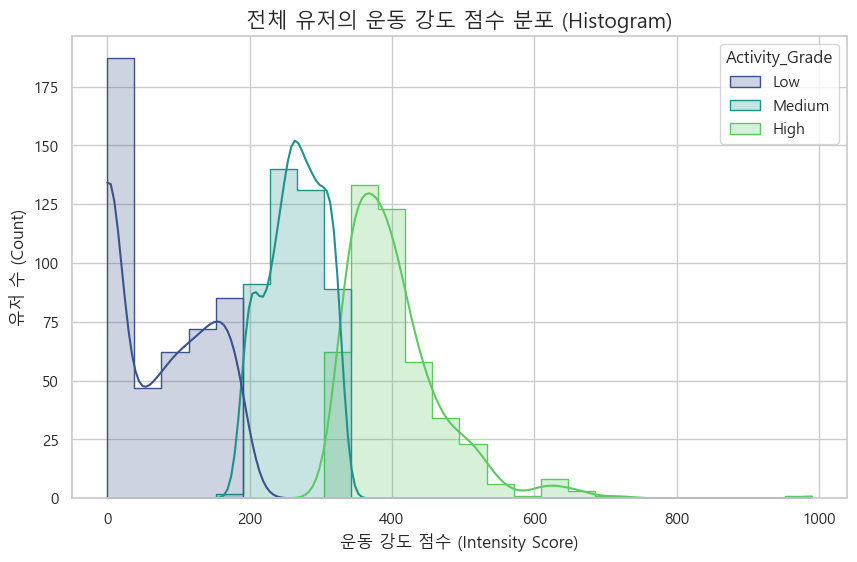

In [16]:
#현황 파악
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic' # 윈도우 한글 폰트 설정 (맥은 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False    # 마이너스 기호 깨짐 방지

# 1.운동 강도 점수 분포: 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(data=act_clean, x='Intensity_Score', hue='Activity_Grade', 
             kde=True, palette='viridis', element="step")

plt.title('전체 유저의 운동 강도 점수 분포 (Histogram)', fontsize=15)
plt.xlabel('운동 강도 점수 (Intensity Score)')
plt.ylabel('유저 수 (Count)')
plt.show()

In [ ]:
#초급자들의 운동패턴은 대부분 걷기 등으로 간단함: 복잡한 운동보다는 단순한미션(10분 더 걷기 등)필요
#중급자들은 자연스럽게 상급으로 넘어가는듯함: 동기부여 열심히
#상급자들끼리의 편차가 강함: 경쟁유도 좋은듯함

C:\Users\USER\AppData\Local\Temp\ipykernel_23152\1859033983.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=act_clean, x='Activity_Grade', y='Efficiency',


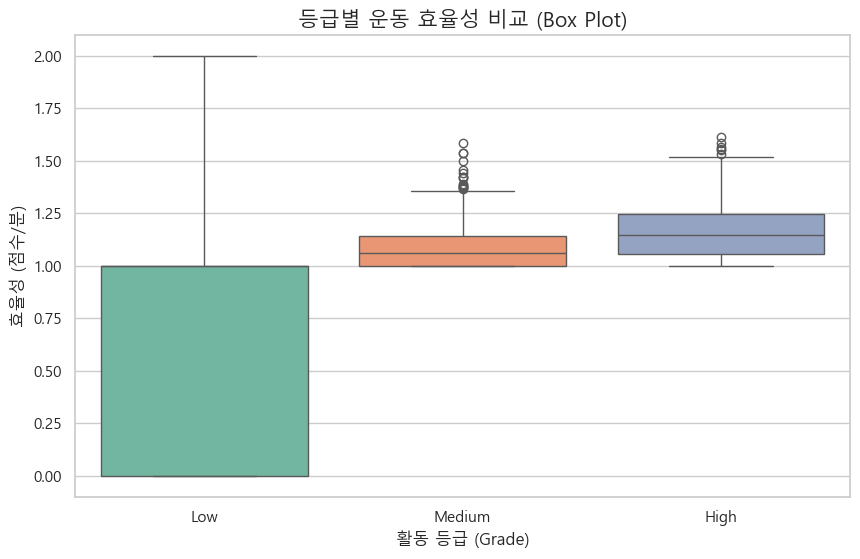

In [ ]:
#운동 가성비(효율성) 분석
# 등급별 효율성 비교:박스 플롯
plt.figure(figsize=(10, 6))
sns.boxplot(data=act_clean, x='Activity_Grade', y='Efficiency', 
            palette='Set2', order=['Low', 'Medium', 'High'])

plt.title('등급별 운동 효율성 비교 (Box Plot)', fontsize=15)
plt.xlabel('활동 등급 (Grade)')
plt.ylabel('효율성 (점수/분)')
plt.show()

In [ ]:
#초급자들은 효율도 낮고 편차도 너무 크다. 그러나 확실히 드러난(튀는) 실력자는 보이지 않기 때문에 일률적인 피드백 가능
#중급자들은 초급자들보다 훨씬 효율적이지만, 강도에 비해 시간이 부족해 상급에 가지못하는 사람들이 많이 보임. '10분더하면 상급' 등의 피드백 필요
#상급자들은 중급자들보다 조금 나은 수준이거나, 상급 중에서도 천외천으로 나뉨. 아래 그룹에게는 공격적인 피드백, 위 그룹에게는 방어적인 피드백 필요

C:\Users\USER\AppData\Local\Temp\ipykernel_23152\1145595944.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_means = act_clean.groupby('Activity_Grade')[['VeryActiveMinutes']].mean().reset_index()
C:\Users\USER\AppData\Local\Temp\ipykernel_23152\1145595944.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grade_means, x='Activity_Grade', y='VeryActiveMinutes',


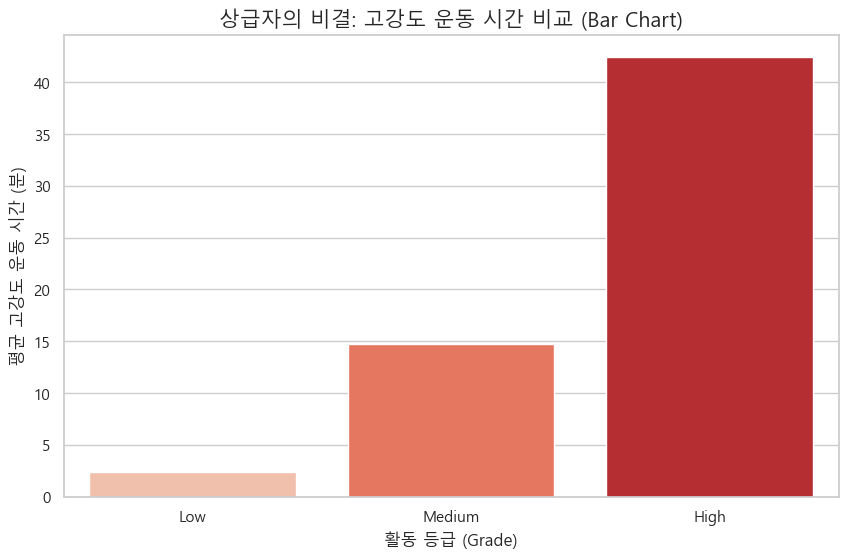

In [18]:
#격차 분석
# 등급별 고강도 운동 시간 비교: 막대 그래프
# 먼저 등급별 평균을 구합니다
grade_means = act_clean.groupby('Activity_Grade')[['VeryActiveMinutes']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grade_means, x='Activity_Grade', y='VeryActiveMinutes', 
            palette='Reds', order=['Low', 'Medium', 'High'])

plt.title('상급자의 비결: 고강도 운동 시간 비교 (Bar Chart)', fontsize=15)
plt.xlabel('활동 등급 (Grade)')
plt.ylabel('평균 고강도 운동 시간 (분)')
plt.show()


In [ ]:
#고강도 운동 시간이 등급에 크게 영향을 줌. 상급자를 희망하는 중급자들에게는 고강도 운동 피드백 필요
#시간<강도 

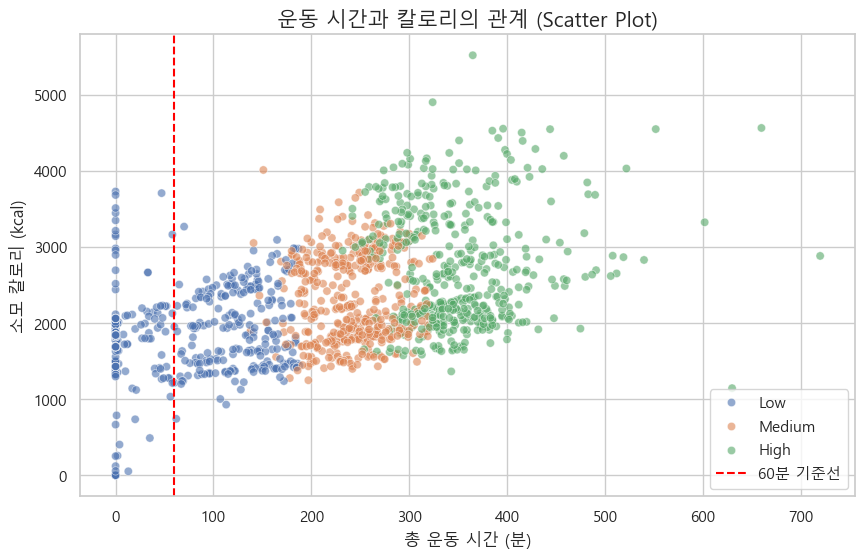

In [20]:
#저효율 그룹 식별
# 운동 시간 vs 소모 칼로리 상관관계: 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(data=act_clean, x='Total_Active_Minutes', y='Calories', 
                hue='Activity_Grade', alpha=0.6, palette='deep')

# 뚜벅이형(저효율) 구간 표시 (60분 이상인데 칼로리 낮은 구간)
plt.axvline(x=60, color='red', linestyle='--', label='60분 기준선')

plt.title('운동 시간과 칼로리의 관계 (Scatter Plot)', fontsize=15)
plt.xlabel('총 운동 시간 (분)')
plt.ylabel('소모 칼로리 (kcal)')
plt.legend()
plt.show()

In [ ]:
#같은시간(x축)을 운동해도 효율(기울기)가 다름.
#같은시간을 할애하지만 기울기 낮은 그룹에게 운동강도 올리는 피드백 필요

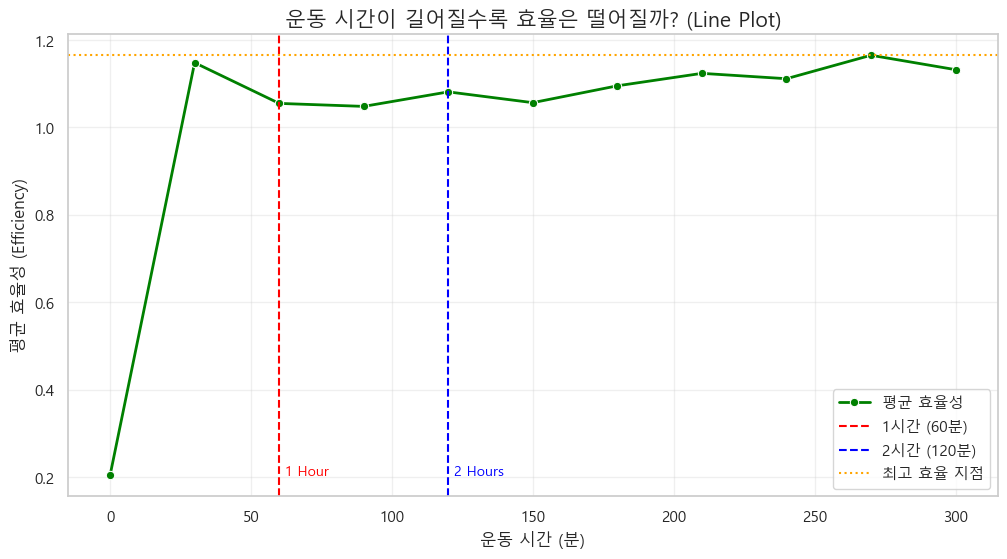

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 운동 시간대별 효율성 변화 추세: 꺾은선 그래프
# 시간을 30분 단위로 묶어서 평균 효율 계산 (기존 로직 동일)
act_clean['Time_Bin_Num'] = (act_clean['Total_Active_Minutes'] // 30) * 30
line_data = act_clean.groupby('Time_Bin_Num')['Efficiency'].mean().reset_index()

# 300분(5시간)까지만 자르기
line_data = line_data[line_data['Time_Bin_Num'] <= 300]

plt.figure(figsize=(12, 6)) # 가로로 좀 더 길게 설정

# 메인 그래프 그리기
sns.lineplot(data=line_data, x='Time_Bin_Num', y='Efficiency', 
             marker='o', color='green', linewidth=2, label='평균 효율성')


# 기준선 긋기(알아보기 편하게)
# 1. 60분 (1시간) 기준선 - 빨간색 점선
plt.axvline(x=60, color='red', linestyle='--', linewidth=1.5, label='1시간 (60분)')

# 2. 120분 (2시간) 기준선 - 파란색 점선
plt.axvline(x=120, color='blue', linestyle='--', linewidth=1.5, label='2시간 (120분)')

# 텍스트도 같이 써주기
plt.text(62, line_data['Efficiency'].min(), '1 Hour', color='red', fontsize=10)
plt.text(122, line_data['Efficiency'].min(), '2 Hours', color='blue', fontsize=10)

# 최고 효율 지점 표시 
max_eff = line_data['Efficiency'].max()
plt.axhline(y=max_eff, color='orange', linestyle=':', label='최고 효율 지점')

# 그래프 꾸미기
plt.title('운동 시간이 길어질수록 효율은 떨어질까? (Line Plot)', fontsize=15)
plt.xlabel('운동 시간 (분)')
plt.ylabel('평균 효율성 (Efficiency)')
plt.legend() # 범례 표시 (이게 있어야 선 이름들이 나옵니다!)
plt.grid(True, alpha=0.3) # 격자 살짝 추가
plt.show()

In [ ]:
#도대체 언제까지 운동해야하는걸까 ㅠㅠ 에 대한 대답.
#그래프가 우상향하는것으로보야 최소 30분은 예열 필요함.
#일반인 기준으로 일상에서 2시간 이상 운동은 무리라고 판단(진짜안됨내가해봄) 최고의 가성비는 2시간지점. 
#고점은 4시간30분 정도이지만... 일반적인 경우에 불가능.
#하등급은 최소 30분~ 최대 2시간으로 시간을 잡고, 강도를 조절하는 피드백이 좋아보임.
#중등급부터는 욕심내서 하고싶은 사람들(상등급 승급 의지가 있는) 에게는 3시간 반까지를 피드백.
#상등급은 현업선수,관련직종 종사자들이 대거 있을것으로 예상되기에 약 260~270분 구간에 '운동멈추기' 피드백.(효율떨어짐) 

[Project Finale] 데이터 기반 맞춤형 코칭 전략서
목표: 개인별 *맞춤형* 피드백 시스템 구축을 통한 앱 이용자 유지 및 유입

그룹 A: "걷기만 하는 초심자" (Low Grade)
대상: 운동 강도 점수가 낮고, VeryActiveMinutes가 거의 0인 유저
근거 차트: [3번 Bar Chart] (상급자와의 압도적인 고강도 시간 차이)
진단: "회원님, 1만 보 걸었다고 만족하시죠? 근데 상급자들은 걷는 게 아니라 '뛰고' 있습니다. 산책 1시간보다 러닝 10분이 등급 상승의 지름길입니다."
맞춤 피드백 (Push 알림):
"회원님! 오늘 1시간 걸으셨네요? 내일은 딱 '5분'만 숨 차게 뛰어볼까요? 상급자로 가는 비밀통로입니다!"
"상위 10% 유저는 하루 평균 45분을 뜁니다. 우리 오늘 10분만 채워봐요!"

그룹 B: "가성비 나쁜 뚜벅이형" (Inefficient Walker)
대상: 운동 시간은 60분 이상인데, 칼로리 소모는 하위권인 유저
근거 차트: [4번 Scatter Plot] (빨간 점선 오른쪽 아래에 깔린 점들)
진단: "시간은 금인데... 너무 낭비하고 계십니다. 몸이 적응해서 칼로리가 안 타요. 지금 필요한 건 '시간'이 아니라 *'강도(Intensity)'*입니다."
맞춤 피드백 (Push 알림):
"회원님, 혹시 지금 산책 중이신가요? 같은 시간을 써도 인터벌(빠르게-느리게)로 걸으면 칼로리가 2배! 딱 5분만 속도를 높여보세요!"
"'저효율 구간'에 진입했습니다! 지금부터는 천천히 걷기보다 스쿼트 3세트가 훨씬 이득입니다!"

그룹 C: "과유불급 고인물" (High Grade & Over-training)
대상: 운동 시간이 120분을 넘어가면서 효율 곡선이 꺾이는 유저
근거 차트: [5번 Line Plot] (120분 기준선 이후 하락세 & 60분 구간 확인)
진단: "너무 열심히 하시네요. 하지만 데이터가 말해줍니다. 지금부터는 운동이 아니라 '노동'이 되고 있다고요. 효율이 떨어지는 구간입니다."
맞춤 피드백 (Push 알림):
"*수확 체감 지점(Sweet Spot)*을 지났습니다! 지금부터는 휴식도 훈련입니다. 오늘은 여기까지 하고 단백질 보충 하러 가시죠!"
"2시간 돌파! 하지만 효율은 떨어지고 있어요. 내일의 컨디션을 위해 쿨다운(Cool-down)을 추천합니다."

그룹 D: "매너리즘 빠진 랭커" (Stagnant High Ranker)
대상: 상급자지만 운동 패턴(표준편차)이 너무 일정한 유저
근거 차트: [1번 Histogram] (상급자 분포 내에서도 정체된 그룹)
진단: "잘하고 계십니다. 근데... 지루하지 않나요? 몸이 루틴에 적응해 버렸어요. '변칙'을 줘야 다시 성장합니다."
맞춤 피드백 (Push 알림):
"*[배틀로얄 초대장] 회원님과 비슷한 레벨의 라이벌이 등장했습니다!* 이번 주는 *'등산'*으로 종목을 바꿔서 승부를 겨뤄보세요!"
"몸이 루틴을 다 외워버렸대요! 오늘은 평소 안 하던 고강도 인터벌로 근육을 놀래켜 줄까요?"